In [1]:
import allutils.graph_generator
from allutils.general_PR import flowPR
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import uuid
from allutils.utils_experiments import *


In [2]:
#mode = sys.argv[1]
mode = 'facebook'

n = 100 #number of nodes in the graph
iters = 100000 #number of temporal edges in the graph
alpha = 0.85

gamma = 1.0

if mode != 'random':
    weights = 'real'
else:
    weights = 'random'
    
colors = ['k', 'r', 'b', 'g']
styles = ['-', '--', ':', '-.']
betas = [0.1, 0.5, 0.9, 1.0]

plt.rcParams.update({'font.size': 20, 'lines.linewidth': 3})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 25
plt.figure('beta')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

344
DiGraph with 100 nodes and 5185 edges
8.672881551122941
344
DiGraph with 100 nodes and 3393 edges
13.014445121404794
344
DiGraph with 100 nodes and 3159 edges
10.006477977665952
344
DiGraph with 100 nodes and 2811 edges
16.518549861989406


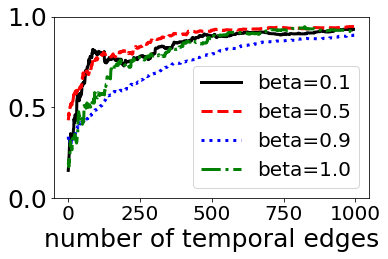

In [10]:

for j in range(len(betas)):
    beta = betas[j]
    G = allutils.graph_generator.weighted_DiGraph(n, seed = 1.0, mode = mode, weights = weights)
    norm = sum([val for (node, val) in G.degree()]) 
    sampling_edges = {e[:-1]: e[-1]['weight']/norm for e in G.edges(data=True)}
    stream = [list(sampling_edges.keys())[i] for i in np.random.choice(range(len(sampling_edges)), size=iters)]#, p=sampling_edges.values()
    personalization = {k: v / norm for k, v in G.out_degree(weight='weight')}
    p_prime_nodes = {i: personalization[i]/G.out_degree(i, weight='weight') for i in G.nodes()}
    pr_basic = nx.pagerank(G, alpha=alpha, personalization=personalization, weight='weight')
    
    RS, current = {}, {}
    RS, current, tau, spearman, pearson, error, x = flowPR(p_prime_nodes, pr_basic, stream, RS, current, iters = iters, beta = beta, gamma = gamma)

    plt.plot(pearson, color=colors[j], linestyle = styles[j])


leg = []
for i in range(len(betas)):
    beta = betas[i]
    leg += ['beta='+str(beta)]

plt.legend(leg, loc=0)
plt.ylim((0, 1.0))
plt.xlabel('number of temporal edges', fontsize=25)
plt.tight_layout()
plt.savefig(mode+'_beta_pearson.pdf')